# 2. Fashin MNIST
#### MNIST 패션 이미지를 딥러닝을 이용하여 분류하시오.
- MNIST 패션데이터는 10종류의 60000개 패션 학습데이터와 10000개의 테스트 데이터로 구성되어 있습니다. 
- 각각의 레이블의 의미는 다음과 같습니다.

|Label|Description|
|:-:|:-:|
|0|T-shirt/top|
|1|Trouser|
|2|Pullover|
|3|Dress|
|4|Coat|
|5|Sandal|
|6|	Shirt|
|7|	Sneaker|
|8|	Bag|
|9|	Ankle boot|


In [39]:
from keras.datasets import fashion_mnist
from tensorflow import keras
from keras import models 
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

(9, <matplotlib.image.AxesImage at 0x7f901b61a940>)

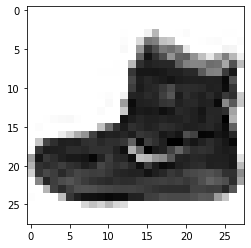

In [40]:
y[0], plt.imshow(X[0],cmap=plt.cm.binary)

(0, <matplotlib.image.AxesImage at 0x7f901a070d68>)

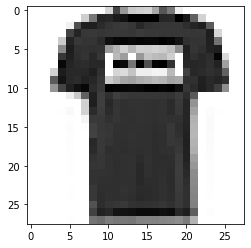

In [41]:
y[1], plt.imshow(X[1],cmap=plt.cm.binary)

In [42]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [43]:
net = models.Sequential()
net.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
net.add(layers.Dense(512, activation='relu')) 
net.add(layers.Dense(512, activation='relu'))
net.add(layers.Dense(10, activation='softmax'))
net.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['accuracy'])

# preprocessing
X_train = X_train.reshape((60000, 28*28))
X_train = X_train/255

X_test = X_test.reshape((10000, 28*28))
X_test = X_test/255

In [44]:
net.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 16s 35ms/step - loss: 0.5016 - accuracy: 0.8158
Epoch 2/5
469/469 [==============================] - 12s 25ms/step - loss: 0.3507 - accuracy: 0.8722
Epoch 3/5
469/469 [==============================] - 12s 25ms/step - loss: 0.3052 - accuracy: 0.8863
Epoch 4/5
469/469 [==============================] - 12s 25ms/step - loss: 0.2808 - accuracy: 0.8952
Epoch 5/5
469/469 [==============================] - 12s 25ms/step - loss: 0.2612 - accuracy: 0.9015


In [45]:
test_loss, test_acc = net.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3305 - accuracy: 0.8842


In [46]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [47]:
val= net.fit(partial_X_train,partial_y_train,epochs=20, batch_size=128, validation_data=(X_val, y_val),verbose=1)

Epoch 1/20
391/391 [==============================] - 10s 27ms/step - loss: 0.2419 - accuracy: 0.9088 - val_loss: 0.2347 - val_accuracy: 0.9107
Epoch 2/20
391/391 [==============================] - 11s 27ms/step - loss: 0.2310 - accuracy: 0.9117 - val_loss: 0.2512 - val_accuracy: 0.9045
Epoch 3/20
391/391 [==============================] - 11s 27ms/step - loss: 0.2193 - accuracy: 0.9164 - val_loss: 0.2567 - val_accuracy: 0.9017
Epoch 4/20
391/391 [==============================] - 11s 27ms/step - loss: 0.2072 - accuracy: 0.9207 - val_loss: 0.2449 - val_accuracy: 0.9067
Epoch 5/20
391/391 [==============================] - 11s 27ms/step - loss: 0.1963 - accuracy: 0.9251 - val_loss: 0.2533 - val_accuracy: 0.9055
Epoch 6/20
391/391 [==============================] - 10s 27ms/step - loss: 0.1845 - accuracy: 0.9291 - val_loss: 0.2561 - val_accuracy: 0.9072
Epoch 7/20
391/391 [==============================] - 10s 27ms/step - loss: 0.1742 - accuracy: 0.9331 - val_loss: 0.2709 - val_accuracy:

In [48]:
val_dict = val.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']

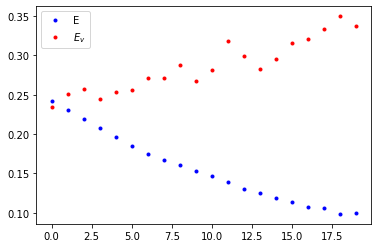

In [50]:
x = np.arange(0,len(loss))
plt.plot(x,loss,'b.',label='E')
plt.plot(x,val_loss,'r.',label='$E_v$')
plt.legend()

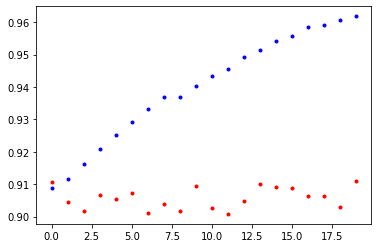

In [52]:
acc = val_dict['accuracy']
val_acc = val_dict['val_accuracy']
plt.plot(x,acc,'b.',label='Accuracy')
plt.plot(x,val_acc,'r.',label='A_v')

In [53]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) 
model.add(layers.Dropout(0.5))  
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dropout(0.5))  
model.add(layers.Dense(10, activation='softmax')) 
model.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['acc'])

In [54]:
val2= model.fit(partial_X_train,partial_y_train,epochs=20, batch_size=128, validation_data=(X_val, y_val),verbose=1)

Epoch 1/20
391/391 [==============================] - 8s 21ms/step - loss: 0.6319 - acc: 0.7730 - val_loss: 0.4320 - val_acc: 0.8394
Epoch 2/20
391/391 [==============================] - 8s 20ms/step - loss: 0.4530 - acc: 0.8364 - val_loss: 0.3739 - val_acc: 0.8635
Epoch 3/20
391/391 [==============================] - 8s 20ms/step - loss: 0.4179 - acc: 0.8469 - val_loss: 0.3663 - val_acc: 0.8615
Epoch 4/20
391/391 [==============================] - 8s 20ms/step - loss: 0.3939 - acc: 0.8561 - val_loss: 0.3404 - val_acc: 0.8771
Epoch 5/20
391/391 [==============================] - 8s 20ms/step - loss: 0.3819 - acc: 0.8611 - val_loss: 0.3327 - val_acc: 0.8764
Epoch 6/20
391/391 [==============================] - 8s 20ms/step - loss: 0.3635 - acc: 0.8674 - val_loss: 0.3393 - val_acc: 0.8755
Epoch 7/20
391/391 [==============================] - 8s 20ms/step - loss: 0.3567 - acc: 0.8692 - val_loss: 0.3218 - val_acc: 0.8842
Epoch 8/20
391/391 [==============================] - 8s 20ms/step - 

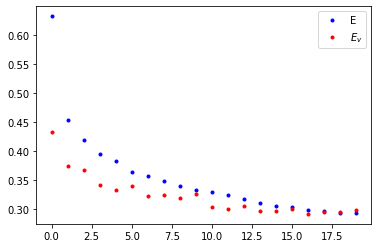

In [55]:
val_dict = val2.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']

x = np.arange(0,len(loss))
plt.plot(x,loss,'b.',label='E')
plt.plot(x,val_loss,'r.',label='$E_v$')
plt.legend()

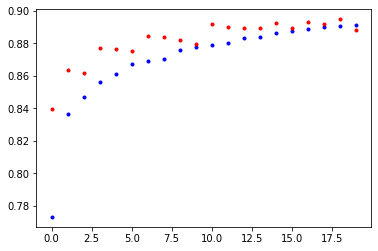

In [57]:
acc = val_dict['acc']
val_acc = val_dict['val_acc']
plt.plot(x,acc,'b.',label='Accuracy')
plt.plot(x,val_acc,'r.',label='A_v')

In [58]:
test_loss, test_acc = net.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4535 - accuracy: 0.8947


In [59]:
test_loss, test_acc = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3279 - acc: 0.8814
